<a href="https://colab.research.google.com/github/ProGenei/GhadeerNoohT5/blob/main/Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/training/Traffic_Signs.zip' -d '/content'

Streaming output truncated to the last 5000 lines.
 extracting: /content/Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: /content/Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: /content/Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: /content/Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: /content/Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: /content/Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: /content/Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: /content/Traf

## Import Libraries

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def file_png(file_path):
  return file_path.endswith('.png')
for file in os.listdir('/content/Traffic_Signs/Dataset'):
  if not file_png(file):
    os.remove(os.path.join('/content/Traffic_Signs/Dataset'), file)

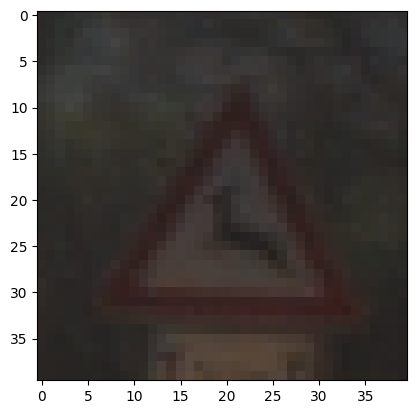

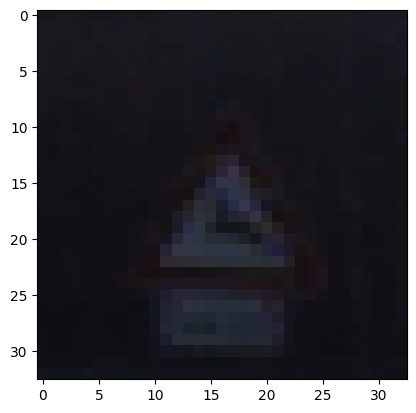

In [ ]:
plt.imshow(plt.imread('Traffic_Signs/Dataset/31/00031_00023_00014.png'))
plt.show()
plt.imshow(plt.imread('Traffic_Signs/Dataset/31/00031_00022_00009.png'))
plt.show()

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import random
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
EarlyStopping


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

training_generator = datagen.flow_from_directory('/content/Traffic_Signs/Dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_generator = datagen.flow_from_directory('/content/Traffic_Signs/Dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='validation')

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [ ]:
training_generator[0][0][0].shape

(224, 224, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(43, activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
training_samples = 30000
validation_samples = 7000

steps_per_epoch = training_samples // training_generator.batch_size
validation_steps = validation_samples // validation_generator.batch_size

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,575,131 (21.27 MB)

 Trainable params: 5,575,131 (21.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)


In [ ]:
history = model.fit(training_generator, epochs=25, steps_per_epoch=steps_per_epoch, validation_data=validation_generator, validation_steps=validation_steps)

Epoch 1/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.5797 - loss: 1.5978 - val_accuracy: 0.8184 - val_loss: 1.0719
Epoch 2/25
 44/937 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - accuracy: 0.9365 - loss: 0.2219

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9449 - loss: 0.1980 - val_accuracy: 0.7757 - val_loss: 1.0292
Epoch 3/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 72s 50ms/step - accuracy: 0.9455 - loss: 0.1883 - val_accuracy: 0.8409 - val_loss: 0.8689
Epoch 4/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9692 - loss: 0.1066 - val_accuracy: 0.8254 - val_loss: 0.8280
Epoch 5/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.9686 - loss: 0.1002 - val_accuracy: 0.8592 - val_loss: 0.5802
Epoch 6/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9745 - loss: 0.0943 - val_accuracy: 0.8335 - val_loss: 0.6871
Epoch 7/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9751 - loss: 0.0886 - val_accuracy: 0.8688 - val_loss: 0.5065
Epoch 8/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9843 - loss: 0.0417 - val_accuracy: 0.8855 - val_loss: 0.4925
Epoch 9/25
937/937 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.9811 - loss: 0.0630 - val_accuracy: 0.871

In [ ]:
model.evaluate(validation_generator)

246/246 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - accuracy: 0.8892 - loss: 0.4690


[0.45799100399017334, 0.8861114382743835]

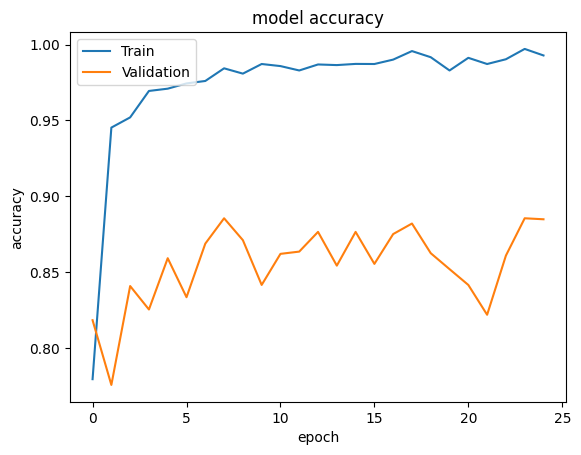

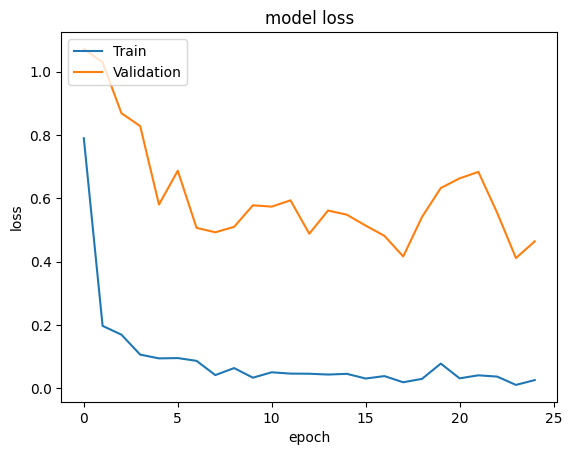

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

## Evaluate the Model
Evaluate the performance of the model on the test set.

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [ ]:
!unzip '/content/drive/MyDrive/training/Test_Dataset.zip' -d '/content'

Archive:  /content/drive/MyDrive/training/Test_Dataset.zip
replace /content/Test_Dataset/Dataset_MetaData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Test_Dataset.zip, Test_Dataset.zip.zip or Test_Dataset.zip.ZIP.


In [ ]:
'/content/Test_Dataset/Dataset/07941.png'

In [ ]:
for filename in files:

    # Passing the entire path of the image file
    file= os.path.join(img_path, filename)

    # Load original via OpenCV, so we can draw on it and display it on our screen
    original = cv2.imread(file)

    image = image_utils.load_img(file, target_size=(224, 224))
    image = image_utils.img_to_array(image)

    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)


    print("[INFO] loading network...")
    model = VGG16(weights="imagenet")    # Load the VGG16 network pre-trained on the ImageNet dataset

    print("[INFO] classifying image...")
    predictions = model.predict(image)   # Classify the image (NumPy array with 1000 entries)
    P = decode_predictions(predictions)  # Get the ImageNet Unique ID of the label, along with human-readable label
    print(P)

    # Loop over the predictions and display the rank-5 (5 epochs) predictions + probabilities to our terminal
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

    original = cv2.imread(file)
    (imagenetID, label, prob) = P[0][0]
    cv2.putText(original, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.imshow(original)
    cv2.waitKey(0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

CLASSES = np.array(training_generator)

def show_images(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(num_images):
        index = np.random.randint(0, len(images))
        axes[i].imshow(images[index])
        axes[i].set_title(CLASSES[labels[index]], fontsize=12)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=1)

# Undo the normalization for displaying purposes
x_train_display = (training_generator * 255).astype('uint8')
y_train_display = training_generator.argmax(axis=1)

show_images(x_train_display, y_train_display)

In [ ]:
plt.imshow(plt.imread('/Test_Dataset/Dataset/07941.png'))
plt.show()


In [ ]:

img = tf.keras.utils.load_img(
    '/content/Test_Dataset/Dataset/07941.png' , target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.0000000e+00 1.3353633e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
import numpy as np

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('./my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
- I used rescale in DataImageGenerator because it will be one of the augmentation methods to make the model more powerful and predict the challenging images in the future
- the Model Architecture contains of Conv2D layers (the first layer contains input shape of (244, 244, 3) because this is the size of the image, and it's colorful so 3), then we did MaxPooling with Max because we want to minimize the image size and take the most significant features of it, and we put size (2, 2), I did DropOut to reduce the overfitting that the model faced, then I flatten the layers to be in 1 dimention, then after finishing the conv layers, we start the dence layers and put 512 as units, in addition we used relu because it's the most suitable activation for the layers, in the finishing layer, the units = classes length so I put it 43 as the number of classes, and activation is softmax because it's more than 2 classes, and 'categorical_crossentropy' as loss function, in general the accuracy is 88 which is hight but it leads to overfitting because maybe the model is too complicated and it has to me regularized
- I used drop out and batch normalization to reduce the overfitting and it did well compared to the previous model I implemented, but still there is a clear overfitting, I tried to reduce it using EarlyStoping and L1,  but the time limitation and the RAM finished without continueing fitting the newest model are the reasons I didn't reduced the overfitting as much as it is
- In activation functions, I used relu which is (0, max) range in the Conv and Dense layers, but in the final layer I used Softmax to make probability on each neoron which used for more than 2 classes compared to sigmoid which just used with binary classes
- I used and 'categorical_crossentropy' as a loss function because 1. binary_crossentropy is for binary classes, 2. The sparse_categorical_crossentropy loss function was at first the usable one, then after trying to fit the model, it says that the input shape is not similar to output shape, so I think the dataset is like the form of 'one_hot_encoded' not in the form of Label_encoded, so the categorical_crossentropy is the suitable one based on the dataset
- I choose the batch size because of the size of images, number of epochs is choosen because to prevent overfitting and make higher accuracy, the same with the optimizer which is the suitable one as a learner and trainer to the model (coach of the model)
- I used accuracy as evaluation (training_accuracy and validation_accuracy) because it shows the accuracy of prediction of the model and show the overfitting/underfitting, in addition I used the loss function
- The visualization always makes insites about the model, so they showed the clear overfitting of the model
- Overfitting is the situation that occured in the model, to prevent it we should use regularization, or more of dropout, batchnormalization, l1, l2, and reduce the complixity of the model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dense(43, activation = 'softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])